# Read Data

In [92]:
import pandas as pd
import numpy as np

In [93]:
df_fish = pd.read_csv('fish_data.csv')
df_fish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [94]:
print("Data Shape : ",df_fish.shape)

Data Shape :  (4080, 4)


In [95]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [96]:
df_fish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [97]:
df_fish.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [98]:
pd.unique(df_fish['species'])

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [99]:
df_fish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_fish['species'] = le.fit_transform(df_fish['species'])
df_fish['species'].value_counts()

species
7    480
0    476
4    475
2    468
5    458
8    455
3    435
6    418
1    415
Name: count, dtype: int64

(array([476., 415., 468., 435.,   0., 475., 458., 418., 480., 455.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

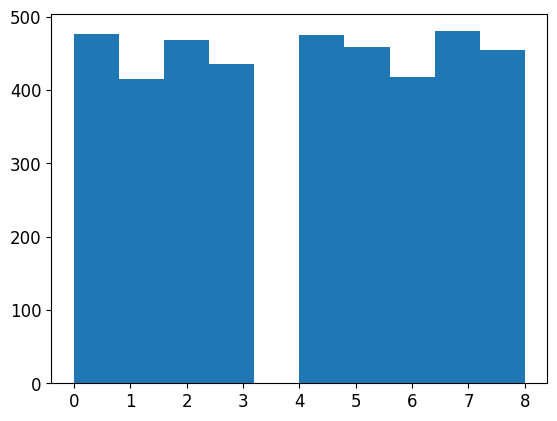

In [114]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

plt.hist(df_fish['species'])


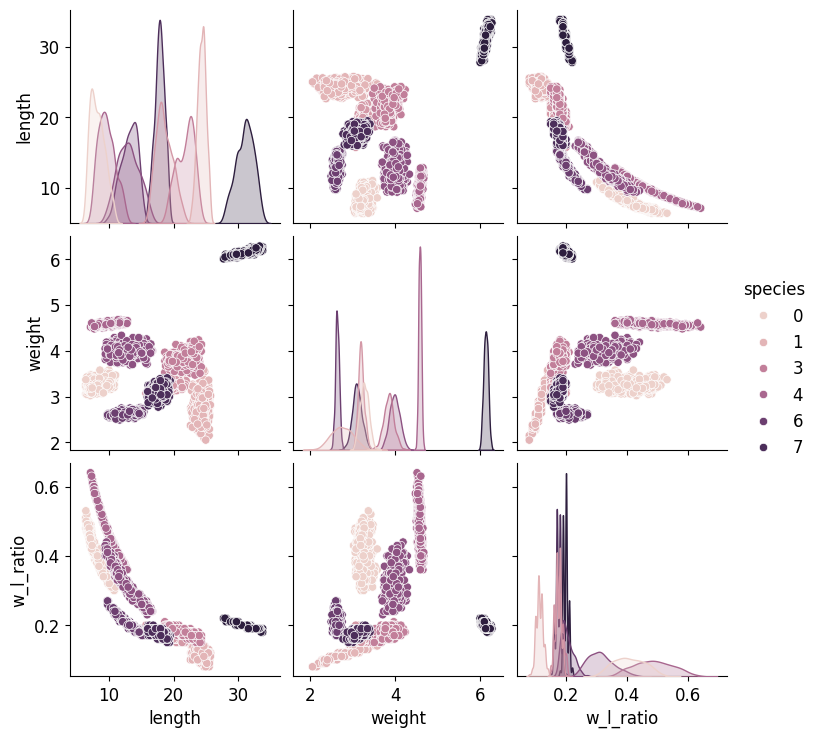

In [116]:
sns.pairplot(data=df_fish,hue='species')

# Split Atribute

In [102]:
x = df_fish.drop('species', axis=1)
y = df_fish['species']

# Scalling

In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x) 
x = scaler.transform(x) 

# Split Train Test

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train Model

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Predict Test

In [106]:
y_pred = logreg.predict(x_test)
y_pred

array([6, 4, 3, 4, 4, 8, 6, 5, 8, 7, 5, 3, 7, 4, 7, 3, 7, 1, 8, 3, 7, 1,
       7, 6, 0, 1, 6, 1, 7, 5, 3, 3, 4, 5, 6, 7, 7, 8, 4, 4, 8, 7, 0, 7,
       1, 7, 7, 7, 5, 6, 1, 5, 7, 4, 5, 6, 7, 1, 1, 7, 3, 8, 3, 1, 1, 3,
       1, 3, 3, 1, 2, 4, 7, 8, 6, 5, 7, 5, 4, 0, 7, 6, 6, 7, 7, 1, 7, 6,
       7, 8, 6, 4, 4, 6, 0, 7, 0, 4, 2, 1, 8, 4, 4, 0, 8, 3, 8, 7, 5, 7,
       1, 0, 7, 8, 7, 7, 0, 8, 5, 8, 7, 2, 1, 7, 0, 1, 4, 0, 3, 4, 0, 4,
       7, 3, 1, 8, 8, 4, 7, 7, 8, 0, 0, 8, 5, 5, 7, 7, 7, 6, 3, 7, 0, 1,
       3, 4, 0, 5, 1, 8, 2, 3, 7, 8, 3, 1, 7, 7, 1, 7, 0, 7, 7, 7, 4, 5,
       8, 3, 0, 5, 2, 4, 6, 6, 1, 4, 1, 4, 8, 8, 5, 1, 5, 0, 4, 0, 3, 3,
       5, 3, 4, 0, 6, 4, 0, 4, 8, 2, 6, 8, 8, 1, 4, 8, 1, 4, 6, 8, 4, 0,
       8, 3, 6, 2, 7, 0, 3, 4, 7, 6, 0, 7, 5, 8, 4, 8, 7, 5, 5, 4, 1, 8,
       3, 8, 2, 6, 4, 6, 1, 0, 1, 1, 0, 4, 7, 7, 8, 5, 7, 8, 5, 5, 7, 7,
       4, 4, 7, 1, 1, 7, 1, 1, 1, 4, 8, 7, 6, 8, 8, 7, 0, 0, 1, 8, 5, 4,
       1, 1, 3, 4, 7, 4, 8, 3, 8, 3, 2, 2, 1, 8, 5,

# Akurasi dan Evaluasi

In [107]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

accuracy = accuracy_score(y_test, y_pred)  
report = classification_report(y_test, y_pred, target_names=le.classes_)
print("\nLaporan Klasifikasi:\n", report)
print("Akurasi Model:", accuracy) 


Laporan Klasifikasi:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      0.98      0.99        97
     Coilia dussumieri       0.98      1.00      0.99        96
Otolithoides biauritus       0.79      0.23      0.36       100
     Otolithoides pama       1.00      0.93      0.96        85
     Pethia conchonius       0.94      1.00      0.97        84
  Polynemus paradiseus       0.98      0.94      0.96        85
  Puntius lateristriga       1.00      1.00      1.00        74
        Setipinna taty       0.57      0.99      0.73       103
 Sillaginopsis panijus       1.00      1.00      1.00        92

              accuracy                           0.89       816
             macro avg       0.92      0.90      0.88       816
          weighted avg       0.91      0.89      0.87       816

Akurasi Model: 0.8884803921568627


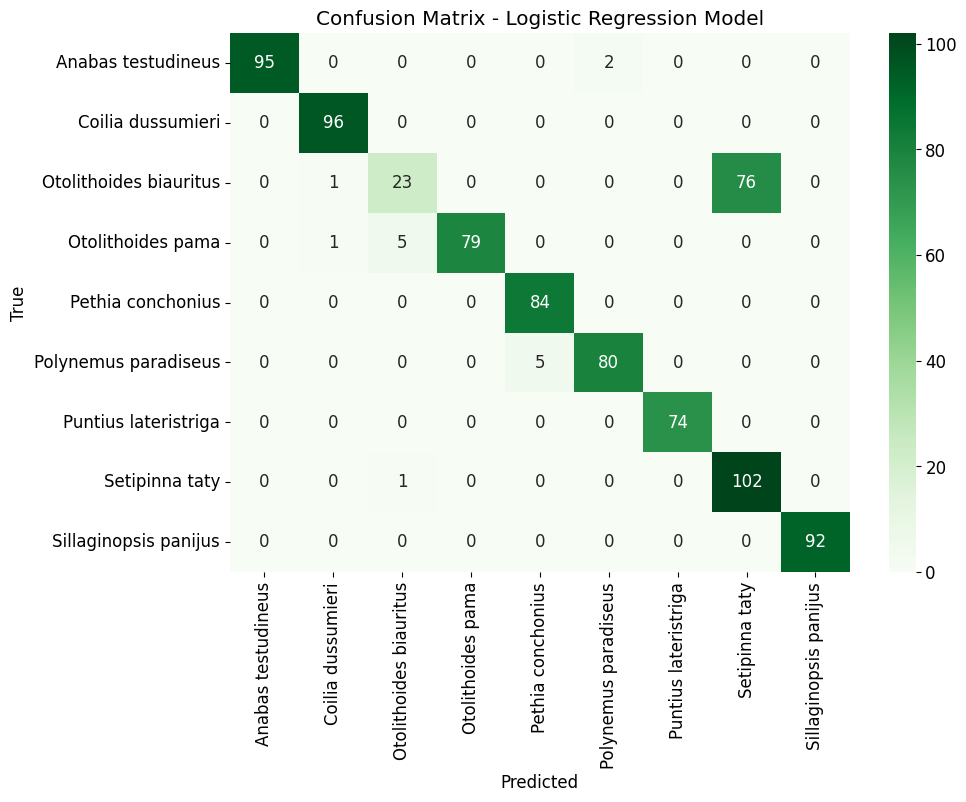

In [108]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pcp_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(pcp_cm, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_20336\1730565576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=le.classes_, y=pcp_cm.diagonal(), palette="viridis")


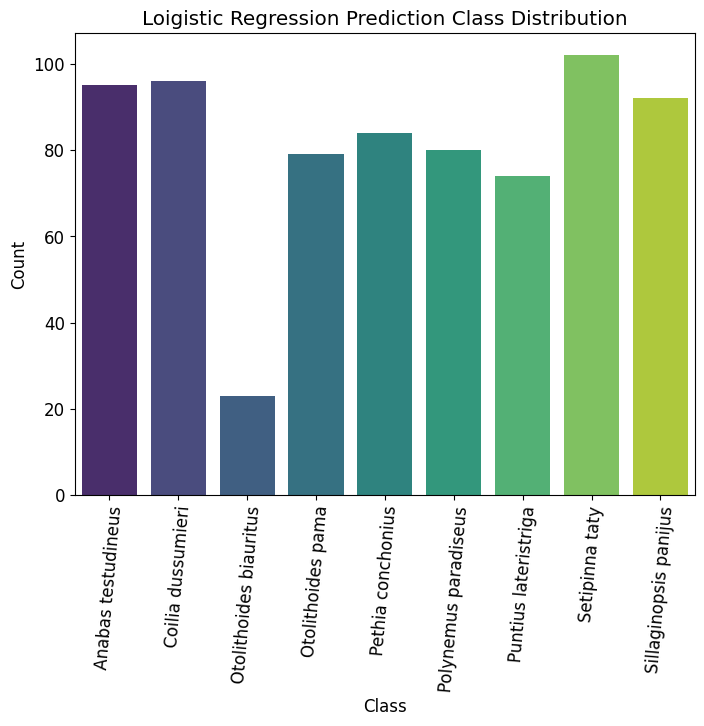

In [109]:
plt.figure(figsize=(8, 6))
sns.barplot(x=le.classes_, y=pcp_cm.diagonal(), palette="viridis")
plt.title("Loigistic Regression Prediction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=85)
plt.show()

# Test Data Baru

In [110]:
new_data = {
    'length' : [40.4],
    'weight' : [5.35],
    'w_l_ratio' : [0.58]}

new_data = pd.DataFrame(new_data)
new_data

,length,weight,w_l_ratio
0,40.4,5.35,0.58


In [111]:
new_predictions = logreg.predict(new_data)
new_species = le.inverse_transform(new_predictions)

print("Prediksi Species :", new_species)
new_predictions

Prediksi Species : ['Coilia dussumieri']


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1])

# Menyimpan Model 

In [112]:
import pickle 
pickle.dump(logreg, open('LR_fish.pkl', 'wb'))